<a href="https://colab.research.google.com/github/venkat2ram/Keras-and-Tensorflow/blob/master/ud_l5_cnn_flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten,MaxPooling2D,Conv2D,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import glob
import shutil
import math
import matplotlib.pyplot as plt

In [2]:
_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
zip_file=tf.keras.utils.get_file(fname="flower_photos.tgz",origin=_URL,extract=True)

228818944/228813984 [==============================] - 3s 0us/step


In [3]:
zip_file

'/root/.keras/datasets/flower_photos.tgz'

In [4]:
!ls -lrt /root/.keras/datasets/*

-rw-r--r-- 1 root   root 228813984 Jul  6 22:30 /root/.keras/datasets/flower_photos.tgz

/root/.keras/datasets/flower_photos:
total 608
-rw-r----- 1 270850 5000 418049 Feb  9  2016 LICENSE.txt
drwx------ 2 270850 5000  36864 Feb 10  2016 tulips
drwx------ 2 270850 5000  36864 Feb 10  2016 sunflowers
drwx------ 2 270850 5000  36864 Feb 10  2016 roses
drwx------ 2 270850 5000  53248 Feb 10  2016 dandelion
drwx------ 2 270850 5000  36864 Feb 10  2016 daisy


In [6]:
base_dir = os.path.join(os.path.dirname(zip_file), 'flower_photos')

In [7]:
classes = ['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips']

In [12]:
for cl in classes:
  img_path = os.path.join(base_dir, cl)
  images = glob.glob(img_path + '/*.jpg')
  print("{}: {} Images".format(cl, len(images)))
  train, val = images[:round(len(images)*0.8)], images[round(len(images)*0.8):]

  for t in train:
    if not os.path.exists(os.path.join(base_dir, 'train', cl)):
      os.makedirs(os.path.join(base_dir, 'train', cl))
    shutil.move(t, os.path.join(base_dir, 'train', cl))

  for v in val:
    if not os.path.exists(os.path.join(base_dir, 'val', cl)):
      os.makedirs(os.path.join(base_dir, 'val', cl))
    shutil.move(v, os.path.join(base_dir, 'val', cl))

roses: 641 Images
daisy: 633 Images
dandelion: 898 Images
sunflowers: 699 Images
tulips: 799 Images


In [13]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

In [15]:
ls -lrt /root/.keras/datasets/flower_photos/train/

total 216
drwxr-xr-x 2 root root 40960 Jul  6 22:36 roses/
drwxr-xr-x 2 root root 36864 Jul  6 22:36 daisy/
drwxr-xr-x 2 root root 53248 Jul  6 22:36 dandelion/
drwxr-xr-x 2 root root 40960 Jul  6 22:36 sunflowers/
drwxr-xr-x 2 root root 49152 Jul  6 22:36 tulips/


### **Data Augmentation:**

In [18]:
BATCH_SIZE=32
IMG_SHAPE=150

In [48]:
img_gen=ImageDataGenerator(rescale=1./255,
                           rotation_range=45,
                           width_shift_range=0.2,
                           height_shift_range=0.2,
                           zoom_range=0.5,
                           #fill_mode='nearest',
                           horizontal_flip=True
                           )

In [52]:
train_img_gen=img_gen.flow_from_directory('/root/.keras/datasets/flower_photos/train/',
                                          target_size=(IMG_SHAPE,IMG_SHAPE),
                                          class_mode='sparse',
                                          batch_size=BATCH_SIZE,
                                          shuffle=True
                                          )

Found 2935 images belonging to 5 classes.


In [53]:
val_img_gen=img_gen.flow_from_directory('/root/.keras/datasets/flower_photos/val/',
                                          target_size=(IMG_SHAPE,IMG_SHAPE),
                                          class_mode='sparse',
                                          batch_size=BATCH_SIZE                                          
                                          )

Found 735 images belonging to 5 classes.


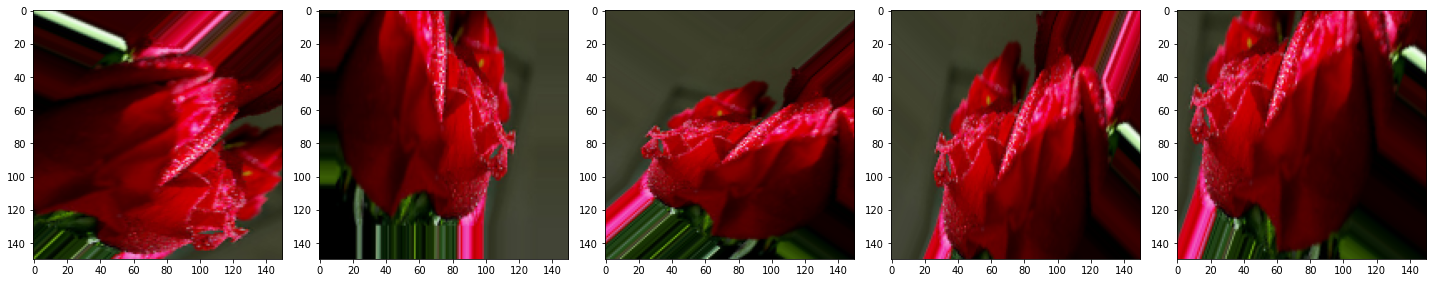

In [54]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()


augmented_images = [train_img_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [62]:
model=tf.keras.models.Sequential([Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
                                  MaxPooling2D((2,2),strides=2),
                                  Conv2D(64,(3,3),activation='relu'),
                                  MaxPooling2D((2,2),strides=2),
                                  Conv2D(128,(3,3),activation='relu'),
                                  MaxPooling2D((2,2),strides=2),
                                  Conv2D(128,(3,3),activation='relu'),
                                  MaxPooling2D((2,2),strides=2),
                                  Flatten(),
                                  Dropout(0.2),
                                  Dense(512,activation='relu'),
                                  Dropout(0.2),
                                  Dense(5,activation='softmax')
                                  ])

In [63]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [64]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

In [67]:
epochs=100

In [65]:
history=model.fit_generator(train_img_gen,epochs=100,
                    steps_per_epoch=int(np.ceil(2935/BATCH_SIZE)),                    
                    validation_data=val_img_gen,
                    validation_steps=int(np.ceil(735/BATCH_SIZE))                                                                  
                    )

Epoch 1/100
92/92 [==============================] - 26s 286ms/step - loss: 1.3728 - accuracy: 0.3881 - val_loss: 1.2142 - val_accuracy: 0.4803
Epoch 2/100
92/92 [==============================] - 26s 283ms/step - loss: 1.1321 - accuracy: 0.5363 - val_loss: 1.1038 - val_accuracy: 0.5469
Epoch 3/100
92/92 [==============================] - 26s 283ms/step - loss: 1.0080 - accuracy: 0.5802 - val_loss: 0.9892 - val_accuracy: 0.5673
Epoch 4/100
92/92 [==============================] - 26s 283ms/step - loss: 0.9290 - accuracy: 0.6191 - val_loss: 0.9714 - val_accuracy: 0.5864
Epoch 5/100
92/92 [==============================] - 26s 282ms/step - loss: 0.8815 - accuracy: 0.6440 - val_loss: 0.8866 - val_accuracy: 0.6517
Epoch 6/100
92/92 [==============================] - 26s 282ms/step - loss: 0.8514 - accuracy: 0.6572 - val_loss: 0.9231 - val_accuracy: 0.6218
Epoch 7/100
92/92 [==============================] - 26s 283ms/step - loss: 0.8365 - accuracy: 0.6692 - val_loss: 0.8908 - val_accuracy:

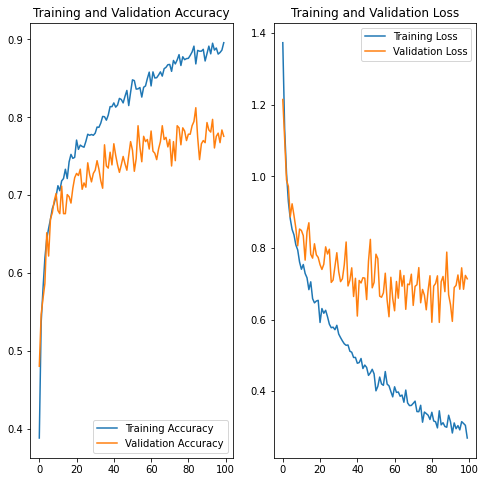

In [68]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()